In [1]:
import numpy as np, pandas as pd

In [2]:
import numpy as np, seaborn as sns, matplotlib.pyplot as plt

In [231]:
df=pd.read_csv("df3 merged integers.csv")

In [232]:
df.head()

,Unnamed: 0,X6.I.consider.myself.a.tech.savvy..well.informed.about.or.proficient.in.the.use.of.modern.technology..especially.computers.,X7.I.have.an.understanding.of.the.basic.computational.principles.of.artificial.intelligence..AI.,X8.I.am.comfortable.with.the.nomenclature.related.to.artificial.intelligence,X9.I.have.an.understanding.of.the.limitations.of.artificial.intelligence,X10.Deep.Learning..and..Artificial.Intelligence..are.currently.being.broadly.discussed.in.the.radiological.community...Were.you.already.aware.of.these.topics.in.radiology..,X11.Deep.Learning..and..Artificial.Intelligence..are.currently.being.broadly.discussed.in.the.radiological.community...Do.you.personally.have.a.basic.understanding.of.the.technologies.used.in.these.topics..,X13.The.following.questions.test.your.understanding.of.deep.learning..a.subtype.of.artificial.intelligence....Deep.learning.is.a.class.of.machine.learning.algorithms.that.use.multiple.layers.of.neural.networks..,X14.The.following.questions.test.your.understanding.of.deep.learning..a.subtype.of.artificial.intelligence....Deep.learning.methods.learn.directly.from.data..without.the.need.for.manual.feature.extraction..,X15.The.following.questions.test.your.understanding.of.deep.learning..a.subtype.of.artificial.intelligence....Application.of.deep.learning.in.radiology.requires.large.databases.of.labeled.medical.images..,...,X30.Which.of.these.specialties.do.you.think.will.be.impacted.the.earliest.and.most.,X31.All.medical.students.should.receive.teaching.in.artificial.intelligence,X32.Teaching.in.artificial.intelligence.will.be.beneficial.for.my.career,X33.At.the.end.of.my.medical.degree..I.will.be.confident.in.using.basic.healthcare.AI.tools.if.required,X34.At.the.end.of.my.medical.degree..I.will.have.a.better.understanding.of.the.methods.used.to.assess.healthcare.AI.algorithm.performance,X35.Overall..at.the.end.of.my.medical.degree..I.feel.I.will.possess.the.knowledge.needed.to.work.with.AI.in.routine.clinical.practice,X36.Would.you.consider.using.the.following.clinical.workflow..Patients..clinical.images.undergo.artificial.intelligence.analysis..A.specialist.subsequently.reviews.both.the.image.and.the.artificial.intelligence.findings.,X37.What.potential.applications.for.AI.in.radiology.do.you.see...Automated.detection.of.pathologies.in.imaging.exams.,X38.What.potential.applications.for.AI.in.radiology.do.you.see...Automated.diagnosis.in.imaging.exams.,X39.What.potential.applications.for.AI.in.radiology.do.you.see...Automated.indication.of.appropriate.imaging.exams.
0,1,9,1,9,1,0,1,9,9,1,...,9,1,0,9,9,9,9,9,9,1
1,2,9,9,9,9,0,0,1,9,1,...,9,1,1,9,1,1,1,1,1,1
2,3,1,9,1,9,1,0,1,9,1,...,9,1,1,9,1,9,1,1,0,0
3,4,9,0,0,0,1,1,1,1,1,...,9,9,9,9,0,9,1,1,1,1
4,5,1,0,9,1,0,0,1,1,9,...,9,1,1,1,1,1,1,1,1,1


In [233]:
df=df.iloc[:,1:34]

In [234]:
df.shape

(4492, 33)

In [320]:
df_demog=pd.read_csv("df_demog_py.csv")
df_demog.head()

,Unnamed: 0,gender,university,living_zone,grade_merged,knowledge_merged,tech_merged,ai_training
0,1,Male,Private,Urban,Academic years,low,N,No
1,2,Female,Governnmental,Urban,Clinical Years,low,N,No
2,3,Female,Governnmental,Urban,Clinical Years,low,A/SA,No
3,4,Male,Governnmental,Rural,Clinical Years,high/moderate,N,Yes
4,5,Male,Governnmental,Urban,Clinical Years,low,A/SA,No


In [321]:
df_demog.shape

(4492, 8)

In [322]:
df_demog=df_demog.iloc[:,1:8]
df_demog.head()

,gender,university,living_zone,grade_merged,knowledge_merged,tech_merged,ai_training
0,Male,Private,Urban,Academic years,low,N,No
1,Female,Governnmental,Urban,Clinical Years,low,N,No
2,Female,Governnmental,Urban,Clinical Years,low,A/SA,No
3,Male,Governnmental,Rural,Clinical Years,high/moderate,N,Yes
4,Male,Governnmental,Urban,Clinical Years,low,A/SA,No


In [330]:
df_demog["ai_training"]=pd.Categorical(df_demog["ai_training"], categories=["Yes","No"],ordered=True )

In [331]:
df_demog.ai_training.value_counts()#it didn't work

No     4152
Yes     340
Name: ai_training, dtype: int64

## knowledge section

## one hot encoding (dummies)

In [237]:
df_knowledge=df[['X7.I.have.an.understanding.of.the.basic.computational.principles.of.artificial.intelligence..AI.',
       'X8.I.am.comfortable.with.the.nomenclature.related.to.artificial.intelligence',
       'X9.I.have.an.understanding.of.the.limitations.of.artificial.intelligence',
       'X10.Deep.Learning..and..Artificial.Intelligence..are.currently.being.broadly.discussed.in.the.radiological.community...Were.you.already.aware.of.these.topics.in.radiology..',
       'X11.Deep.Learning..and..Artificial.Intelligence..are.currently.being.broadly.discussed.in.the.radiological.community...Do.you.personally.have.a.basic.understanding.of.the.technologies.used.in.these.topics..',
       'X13.The.following.questions.test.your.understanding.of.deep.learning..a.subtype.of.artificial.intelligence....Deep.learning.is.a.class.of.machine.learning.algorithms.that.use.multiple.layers.of.neural.networks..',
       'X14.The.following.questions.test.your.understanding.of.deep.learning..a.subtype.of.artificial.intelligence....Deep.learning.methods.learn.directly.from.data..without.the.need.for.manual.feature.extraction..',
       'X15.The.following.questions.test.your.understanding.of.deep.learning..a.subtype.of.artificial.intelligence....Application.of.deep.learning.in.radiology.requires.large.databases.of.labeled.medical.images..',
       'X16.The.following.questions.test.your.understanding.of.deep.learning..a.subtype.of.artificial.intelligence....Deep.learning.systems.are.often.opaque..it.can.be.difficult.to.delineate.the.underlying..thought.process...',
       ]]

In [238]:
df_knowledge.shape

(4492, 9)

In [239]:
df_knowledge.dtypes.value_counts()

int64    9
dtype: int64

In [240]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [241]:
df_knowledge.describe()

,X7.I.have.an.understanding.of.the.basic.computational.principles.of.artificial.intelligence..AI.,X8.I.am.comfortable.with.the.nomenclature.related.to.artificial.intelligence,X9.I.have.an.understanding.of.the.limitations.of.artificial.intelligence,X10.Deep.Learning..and..Artificial.Intelligence..are.currently.being.broadly.discussed.in.the.radiological.community...Were.you.already.aware.of.these.topics.in.radiology..,X11.Deep.Learning..and..Artificial.Intelligence..are.currently.being.broadly.discussed.in.the.radiological.community...Do.you.personally.have.a.basic.understanding.of.the.technologies.used.in.these.topics..,X13.The.following.questions.test.your.understanding.of.deep.learning..a.subtype.of.artificial.intelligence....Deep.learning.is.a.class.of.machine.learning.algorithms.that.use.multiple.layers.of.neural.networks..,X14.The.following.questions.test.your.understanding.of.deep.learning..a.subtype.of.artificial.intelligence....Deep.learning.methods.learn.directly.from.data..without.the.need.for.manual.feature.extraction..,X15.The.following.questions.test.your.understanding.of.deep.learning..a.subtype.of.artificial.intelligence....Application.of.deep.learning.in.radiology.requires.large.databases.of.labeled.medical.images..,X16.The.following.questions.test.your.understanding.of.deep.learning..a.subtype.of.artificial.intelligence....Deep.learning.systems.are.often.opaque..it.can.be.difficult.to.delineate.the.underlying..thought.process...
count,4492.000000,4492.000000,4492.000000,4492.000000,4492.000000,4492.000000,4492.000000,4492.000000,4492.00000
mean,2.621995,2.325022,1.989982,0.345058,0.168522,6.118433,5.790739,5.156278,5.94390
std,3.914249,3.774820,3.563545,0.475440,0.374371,3.894769,4.151852,4.049688,4.02126
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.00000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,9.000000,9.000000,9.00000
75%,9.000000,1.000000,1.000000,1.000000,0.000000,9.000000,9.000000,9.000000,9.00000
max,9.000000,9.000000,9.000000,1.000000,1.000000,9.000000,9.000000,9.000000,9.00000


In [242]:
df_knowledge=df_knowledge.astype(object)

In [243]:
df_knowledge_dummies=pd.get_dummies(df_knowledge)

/tmp/ipykernel_25075/2952802073.py:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  df_knowledge_dummies=pd.get_dummies(df_knowledge)
/tmp/ipykernel_25075/2952802073.py:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  df_knowledge_dummies=pd.get_dummies(df_knowledge)
/tmp/ipykernel_25075/2952802073.py:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  df_knowledge_dummies=pd.get_dummies(df_knowledge)
/tmp/ipykernel_25075/2952802073.py:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  df_knowledge_dummies=pd.get_dummies(df_knowledge)
/tmp/ipykernel_25075/2952802073.py:1: Fu

In [244]:
df_knowledge_dummies.shape

(4492, 25)

In [245]:
df_knowledge_dummies.head()

,X7.I.have.an.understanding.of.the.basic.computational.principles.of.artificial.intelligence..AI._0,X7.I.have.an.understanding.of.the.basic.computational.principles.of.artificial.intelligence..AI._1,X7.I.have.an.understanding.of.the.basic.computational.principles.of.artificial.intelligence..AI._9,X8.I.am.comfortable.with.the.nomenclature.related.to.artificial.intelligence_0,X8.I.am.comfortable.with.the.nomenclature.related.to.artificial.intelligence_1,X8.I.am.comfortable.with.the.nomenclature.related.to.artificial.intelligence_9,X9.I.have.an.understanding.of.the.limitations.of.artificial.intelligence_0,X9.I.have.an.understanding.of.the.limitations.of.artificial.intelligence_1,X9.I.have.an.understanding.of.the.limitations.of.artificial.intelligence_9,X10.Deep.Learning..and..Artificial.Intelligence..are.currently.being.broadly.discussed.in.the.radiological.community...Were.you.already.aware.of.these.topics.in.radiology.._0,...,X13.The.following.questions.test.your.understanding.of.deep.learning..a.subtype.of.artificial.intelligence....Deep.learning.is.a.class.of.machine.learning.algorithms.that.use.multiple.layers.of.neural.networks.._9,X14.The.following.questions.test.your.understanding.of.deep.learning..a.subtype.of.artificial.intelligence....Deep.learning.methods.learn.directly.from.data..without.the.need.for.manual.feature.extraction.._0,X14.The.following.questions.test.your.understanding.of.deep.learning..a.subtype.of.artificial.intelligence....Deep.learning.methods.learn.directly.from.data..without.the.need.for.manual.feature.extraction.._1,X14.The.following.questions.test.your.understanding.of.deep.learning..a.subtype.of.artificial.intelligence....Deep.learning.methods.learn.directly.from.data..without.the.need.for.manual.feature.extraction.._9,X15.The.following.questions.test.your.understanding.of.deep.learning..a.subtype.of.artificial.intelligence....Application.of.deep.learning.in.radiology.requires.large.databases.of.labeled.medical.images.._0,X15.The.following.questions.test.your.understanding.of.deep.learning..a.subtype.of.artificial.intelligence....Application.of.deep.learning.in.radiology.requires.large.databases.of.labeled.medical.images.._1,X15.The.following.questions.test.your.understanding.of.deep.learning..a.subtype.of.artificial.intelligence....Application.of.deep.learning.in.radiology.requires.large.databases.of.labeled.medical.images.._9,X16.The.following.questions.test.your.understanding.of.deep.learning..a.subtype.of.artificial.intelligence....Deep.learning.systems.are.often.opaque..it.can.be.difficult.to.delineate.the.underlying..thought.process..._0,X16.The.following.questions.test.your.understanding.of.deep.learning..a.subtype.of.artificial.intelligence....Deep.learning.systems.are.often.opaque..it.can.be.difficult.to.delineate.the.underlying..thought.process..._1,X16.The.following.questions.test.your.understanding.of.deep.learning..a.subtype.of.artificial.intelligence....Deep.learning.systems.are.often.opaque..it.can.be.difficult.to.delineate.the.underlying..thought.process..._9
0,0,1,0,0,0,1,0,1,0,1,...,1,0,0,1,0,1,0,0,0,1
1,0,0,1,0,0,1,0,0,1,1,...,0,0,0,1,0,1,0,0,0,1
2,0,0,1,0,1,0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
3,1,0,0,1,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,1,0
4,1,0,0,0,0,1,0,1,0,1,...,0,0,1,0,0,0,1,0,0,1


In [246]:
km_k=KMeans(n_clusters=4)
knowledge_clust=km_k.fit(df_knowledge_dummies)

/home/tarek/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [247]:
df_knowledge["km"]=km_k.predict(df_knowledge_dummies)

In [248]:
df_knowledge.km.value_counts(normalize=True)

2    0.387133
1    0.230187
3    0.226625
0    0.156055
Name: km, dtype: float64

## finding the optimum k using the elbow method

In [249]:
wcss=[]
for i in range (1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df_knowledge_dummies)
    wcss.append(kmeans.inertia_)


/home/tarek/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/tarek/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/tarek/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/tarek/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/tarek/.local/lib/python3.10/si

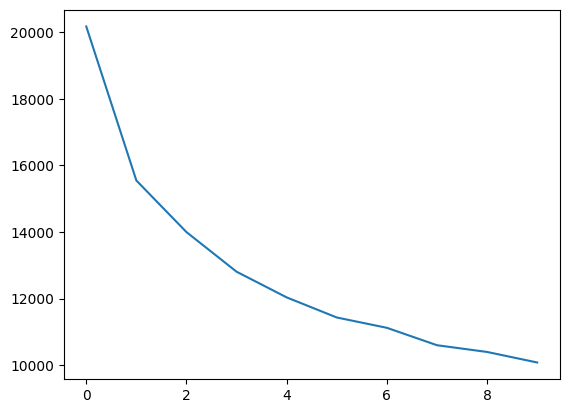

In [250]:
plt.plot(wcss)

In [251]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score

In [252]:
silhouette_avg_knowledge_ohc = silhouette_score(df_knowledge_dummies, km_k.labels_)
print('Silhouette score for knowledge ohc:', silhouette_avg_knowledge_ohc)

Silhouette score for knowledge ohc: 0.24972853838012019


## standard scaler

In [253]:
df_knowledge=df[['X7.I.have.an.understanding.of.the.basic.computational.principles.of.artificial.intelligence..AI.',
       'X8.I.am.comfortable.with.the.nomenclature.related.to.artificial.intelligence',
       'X9.I.have.an.understanding.of.the.limitations.of.artificial.intelligence',
       'X10.Deep.Learning..and..Artificial.Intelligence..are.currently.being.broadly.discussed.in.the.radiological.community...Were.you.already.aware.of.these.topics.in.radiology..',
       'X11.Deep.Learning..and..Artificial.Intelligence..are.currently.being.broadly.discussed.in.the.radiological.community...Do.you.personally.have.a.basic.understanding.of.the.technologies.used.in.these.topics..',
       'X13.The.following.questions.test.your.understanding.of.deep.learning..a.subtype.of.artificial.intelligence....Deep.learning.is.a.class.of.machine.learning.algorithms.that.use.multiple.layers.of.neural.networks..',
       'X14.The.following.questions.test.your.understanding.of.deep.learning..a.subtype.of.artificial.intelligence....Deep.learning.methods.learn.directly.from.data..without.the.need.for.manual.feature.extraction..',
       'X15.The.following.questions.test.your.understanding.of.deep.learning..a.subtype.of.artificial.intelligence....Application.of.deep.learning.in.radiology.requires.large.databases.of.labeled.medical.images..',
       'X16.The.following.questions.test.your.understanding.of.deep.learning..a.subtype.of.artificial.intelligence....Deep.learning.systems.are.often.opaque..it.can.be.difficult.to.delineate.the.underlying..thought.process...',
       ]]

In [254]:
df_knowledge.head()

,X7.I.have.an.understanding.of.the.basic.computational.principles.of.artificial.intelligence..AI.,X8.I.am.comfortable.with.the.nomenclature.related.to.artificial.intelligence,X9.I.have.an.understanding.of.the.limitations.of.artificial.intelligence,X10.Deep.Learning..and..Artificial.Intelligence..are.currently.being.broadly.discussed.in.the.radiological.community...Were.you.already.aware.of.these.topics.in.radiology..,X11.Deep.Learning..and..Artificial.Intelligence..are.currently.being.broadly.discussed.in.the.radiological.community...Do.you.personally.have.a.basic.understanding.of.the.technologies.used.in.these.topics..,X13.The.following.questions.test.your.understanding.of.deep.learning..a.subtype.of.artificial.intelligence....Deep.learning.is.a.class.of.machine.learning.algorithms.that.use.multiple.layers.of.neural.networks..,X14.The.following.questions.test.your.understanding.of.deep.learning..a.subtype.of.artificial.intelligence....Deep.learning.methods.learn.directly.from.data..without.the.need.for.manual.feature.extraction..,X15.The.following.questions.test.your.understanding.of.deep.learning..a.subtype.of.artificial.intelligence....Application.of.deep.learning.in.radiology.requires.large.databases.of.labeled.medical.images..,X16.The.following.questions.test.your.understanding.of.deep.learning..a.subtype.of.artificial.intelligence....Deep.learning.systems.are.often.opaque..it.can.be.difficult.to.delineate.the.underlying..thought.process...
0,1,9,1,0,1,9,9,1,9
1,9,9,9,0,0,1,9,1,9
2,9,1,9,1,0,1,9,1,9
3,0,0,0,1,1,1,1,1,1
4,0,9,1,0,0,1,1,9,9


In [255]:
s=StandardScaler()
df_knowledge_s=s.fit_transform(df_knowledge)

In [256]:
df_knowledge_s

array([[-0.41442826,  1.76848701, -0.27783917, ...,  0.77305699,
        -1.02643466,  0.7600702 ],
       [ 1.62961428,  1.76848701,  1.96736626, ...,  0.77305699,
        -1.02643466,  0.7600702 ],
       [ 1.62961428, -0.35105505,  1.96736626, ...,  0.77305699,
        -1.02643466,  0.7600702 ],
       ...,
       [-0.66993358, -0.61599781, -0.55848985, ..., -1.39489169,
        -1.02643466,  0.7600702 ],
       [-0.66993358, -0.61599781, -0.55848985, ..., -1.39489169,
        -1.02643466,  0.7600702 ],
       [-0.66993358, -0.61599781, -0.55848985, ...,  0.77305699,
        -1.02643466, -1.22957743]])

In [257]:
km_k_s=KMeans(n_clusters=4)
knowledge_clust_s=km_k_s.fit(df_knowledge_s)
silhouette_avg_knowledge_s=silhouette_score(df_knowledge_s, km_k_s.labels_)
print("silhouette_avg_knowledge_s:",silhouette_avg_knowledge_s)

/home/tarek/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


silhouette_avg_knowledge_s: 0.3047495947751281


In [258]:
#the one hot encoding is more accurate than standerdization in the knowledge section
#silhouette_avg_knowledge_s: 0.30471199449553726
#Silhouette score for knowledge ohc: 0.2490288772092691
#Silhouette score for knowledge: 0.36071214672074053

## the attitude section

## one hot encoding

In [259]:
df.columns

Index(['X6.I.consider.myself.a.tech.savvy..well.informed.about.or.proficient.in.the.use.of.modern.technology..especially.computers.',
       'X7.I.have.an.understanding.of.the.basic.computational.principles.of.artificial.intelligence..AI.',
       'X8.I.am.comfortable.with.the.nomenclature.related.to.artificial.intelligence',
       'X9.I.have.an.understanding.of.the.limitations.of.artificial.intelligence',
       'X10.Deep.Learning..and..Artificial.Intelligence..are.currently.being.broadly.discussed.in.the.radiological.community...Were.you.already.aware.of.these.topics.in.radiology..',
       'X11.Deep.Learning..and..Artificial.Intelligence..are.currently.being.broadly.discussed.in.the.radiological.community...Do.you.personally.have.a.basic.understanding.of.the.technologies.used.in.these.topics..',
       'X13.The.following.questions.test.your.understanding.of.deep.learning..a.subtype.of.artificial.intelligence....Deep.learning.is.a.class.of.machine.learning.algorithms.that.use.multip

In [260]:
df_attitude_rad=df[['X17.Feelings.and.attitudes.towards.artificial.intelligence.and.deep.learning.in.medicine.and.radiology...Artificial.intelligence.will.revolutionize.radiology.', 'X27.Feelings.and.attitudes.towards.artificial.intelligence.and.deep.learning.in.medicine.and.radiology...Artificial.intelligence.will.improve.radiology.','X19.Feelings.and.attitudes.towards.artificial.intelligence.and.deep.learning.in.medicine.and.radiology...The.human.radiologist.will.be.replaced.in.the.foreseeable.future.','X23.Feelings.and.attitudes.towards.artificial.intelligence.and.deep.learning.in.medicine.and.radiology...These.developments.make.radiology.more.exciting.to.me.','X26.Feelings.and.attitudes.towards.artificial.intelligence.and.deep.learning.in.medicine.and.radiology...The.impact.of.artificial.intelligence.alone.will.reduce.the.number.of.radiologists.that.are.needed..','X29.Feelings.and.attitudes.towards.artificial.intelligence.and.deep.learning.in.medicine.and.radiology...I.am.less.likely.to.consider.a.career.in.radiology..given.the.advancement.of.AI.']]

In [261]:
df_attitude_rad.shape

(4492, 6)

In [262]:
df_attitude_rad.dtypes.value_counts()

int64    6
dtype: int64

In [263]:
df_attitude_rad.head()

,X17.Feelings.and.attitudes.towards.artificial.intelligence.and.deep.learning.in.medicine.and.radiology...Artificial.intelligence.will.revolutionize.radiology.,X27.Feelings.and.attitudes.towards.artificial.intelligence.and.deep.learning.in.medicine.and.radiology...Artificial.intelligence.will.improve.radiology.,X19.Feelings.and.attitudes.towards.artificial.intelligence.and.deep.learning.in.medicine.and.radiology...The.human.radiologist.will.be.replaced.in.the.foreseeable.future.,X23.Feelings.and.attitudes.towards.artificial.intelligence.and.deep.learning.in.medicine.and.radiology...These.developments.make.radiology.more.exciting.to.me.,X26.Feelings.and.attitudes.towards.artificial.intelligence.and.deep.learning.in.medicine.and.radiology...The.impact.of.artificial.intelligence.alone.will.reduce.the.number.of.radiologists.that.are.needed..,X29.Feelings.and.attitudes.towards.artificial.intelligence.and.deep.learning.in.medicine.and.radiology...I.am.less.likely.to.consider.a.career.in.radiology..given.the.advancement.of.AI.
0,1,1,0,0,9,0
1,1,1,1,1,1,1
2,1,1,9,1,1,1
3,1,1,1,1,1,1
4,1,1,9,9,1,1


In [264]:
df_attitude_rad=df_attitude_rad.astype(object)

In [265]:
df_attitude_rad_dummies=pd.get_dummies(df_attitude_rad)

/tmp/ipykernel_25075/2020937743.py:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  df_attitude_rad_dummies=pd.get_dummies(df_attitude_rad)
/tmp/ipykernel_25075/2020937743.py:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  df_attitude_rad_dummies=pd.get_dummies(df_attitude_rad)
/tmp/ipykernel_25075/2020937743.py:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  df_attitude_rad_dummies=pd.get_dummies(df_attitude_rad)
/tmp/ipykernel_25075/2020937743.py:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  df_attitude_rad_dummies=pd.get_dummies(df_attitude_rad)
/tmp/ipykernel_2

In [266]:
df_attitude_rad_dummies.shape

(4492, 18)

In [267]:
from sklearn.cluster import KMeans
wcss=[]
for i in range (1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df_attitude_rad_dummies)
    wcss.append(kmeans.inertia_)

/home/tarek/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/tarek/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/tarek/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/tarek/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/tarek/.local/lib/python3.10/si

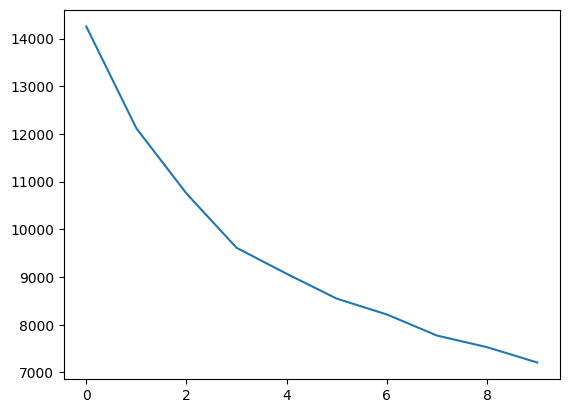

In [268]:
plt.plot(wcss)

In [269]:
km_a_r_ohc=KMeans(n_clusters=3)
model=km_a_r_ohc.fit(df_attitude_rad_dummies)
silhouette_avg_a_r_ohc = silhouette_score(df_attitude_rad_dummies, km_a_r_ohc.labels_)
print('Silhouette score A R OHC:', silhouette_avg_a_r_ohc)

/home/tarek/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score A R OHC: 0.1767696818760983


## standerdization attitude rad

In [270]:
df_attitude_rad=df[['X17.Feelings.and.attitudes.towards.artificial.intelligence.and.deep.learning.in.medicine.and.radiology...Artificial.intelligence.will.revolutionize.radiology.', 'X27.Feelings.and.attitudes.towards.artificial.intelligence.and.deep.learning.in.medicine.and.radiology...Artificial.intelligence.will.improve.radiology.','X19.Feelings.and.attitudes.towards.artificial.intelligence.and.deep.learning.in.medicine.and.radiology...The.human.radiologist.will.be.replaced.in.the.foreseeable.future.','X23.Feelings.and.attitudes.towards.artificial.intelligence.and.deep.learning.in.medicine.and.radiology...These.developments.make.radiology.more.exciting.to.me.','X26.Feelings.and.attitudes.towards.artificial.intelligence.and.deep.learning.in.medicine.and.radiology...The.impact.of.artificial.intelligence.alone.will.reduce.the.number.of.radiologists.that.are.needed..','X29.Feelings.and.attitudes.towards.artificial.intelligence.and.deep.learning.in.medicine.and.radiology...I.am.less.likely.to.consider.a.career.in.radiology..given.the.advancement.of.AI.']]

In [271]:
df_attitude_rad_s=s.fit_transform(df_attitude_rad)
df_attitude_rad_s

array([[-0.3809982 , -0.46685668, -0.83010311, -0.87211188,  1.4021436 ,
        -0.9026038 ],
       [-0.3809982 , -0.46685668, -0.58864593, -0.60694831, -0.63948656,
        -0.6630613 ],
       [-0.3809982 , -0.46685668,  1.34301147, -0.60694831, -0.63948656,
        -0.6630613 ],
       ...,
       [-0.3809982 , -0.46685668, -0.83010311,  1.51436024,  1.4021436 ,
         1.25327865],
       [-0.3809982 , -0.46685668, -0.58864593, -0.60694831, -0.63948656,
         1.25327865],
       [-0.3809982 , -0.46685668,  1.34301147, -0.60694831,  1.4021436 ,
        -0.9026038 ]])

In [272]:
wcss_a_r_s=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init="k-means++", random_state=42)
    kmeans.fit(df_attitude_rad_s)
    wcss_a_r_s.append(kmeans.inertia_)

/home/tarek/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/tarek/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/tarek/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/tarek/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/tarek/.local/lib/python3.10/si

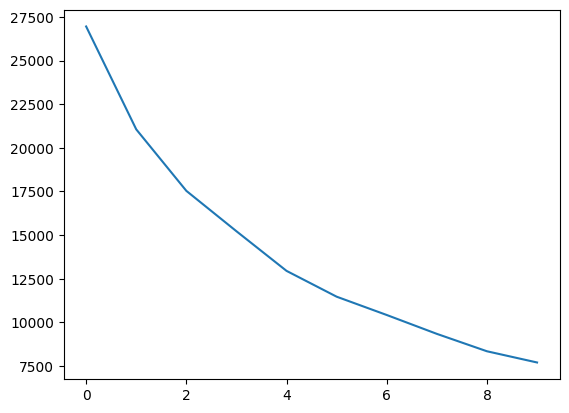

In [273]:
plt.plot(wcss_a_r_s)

In [276]:
km_a_r_s=KMeans(n_clusters=2)
a_r_s_clust=km_a_r_s.fit(df_attitude_rad_s)
silhouette_avg_a_r_s=silhouette_score(df_attitude_rad_s, km_a_r_s.labels_)
print("silhouette_avg_a_r_s2:", silhouette_avg_a_r_s)

/home/tarek/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


silhouette_avg_a_r_s2: 0.34082325484966697


In [104]:
#silhouette_avg_a_r_s2: 0.3374656801303834
#Silhouette score A R OHC: 0.17548861955525158

## attitude total

## OHC

In [277]:
df_attitude=df[['X17.Feelings.and.attitudes.towards.artificial.intelligence.and.deep.learning.in.medicine.and.radiology...Artificial.intelligence.will.revolutionize.radiology.',
       'X18.Feelings.and.attitudes.towards.artificial.intelligence.and.deep.learning.in.medicine.and.radiology...Artificial.intelligence.will.revolutionize.medicine.in.general.',
       'X19.Feelings.and.attitudes.towards.artificial.intelligence.and.deep.learning.in.medicine.and.radiology...The.human.radiologist.will.be.replaced.in.the.foreseeable.future.',
       'X20.Feelings.and.attitudes.towards.artificial.intelligence.and.deep.learning.in.medicine.and.radiology...The.human..non.interventional..physician.will.be.replaced.in.the.foreseeable.future.',
       'X21.Feelings.and.attitudes.towards.artificial.intelligence.and.deep.learning.in.medicine.and.radiology...In.the.foreseeable.future..all.physicians.will.be.replaced.',
       'X22.Feelings.and.attitudes.towards.artificial.intelligence.and.deep.learning.in.medicine.and.radiology...These.developments.frighten.me.',
       'X23.Feelings.and.attitudes.towards.artificial.intelligence.and.deep.learning.in.medicine.and.radiology...These.developments.make.radiology.more.exciting.to.me.',
       'X24.Feelings.and.attitudes.towards.artificial.intelligence.and.deep.learning.in.medicine.and.radiology...These.developments.make.medicine.in.general.more.exciting.to.me.',
       'X25.Feelings.and.attitudes.towards.artificial.intelligence.and.deep.learning.in.medicine.and.radiology...Artificial.intelligence.will.never.make.the.human.physician.expendable.',
       'X26.Feelings.and.attitudes.towards.artificial.intelligence.and.deep.learning.in.medicine.and.radiology...The.impact.of.artificial.intelligence.alone.will.reduce.the.number.of.radiologists.that.are.needed..',
       'X27.Feelings.and.attitudes.towards.artificial.intelligence.and.deep.learning.in.medicine.and.radiology...Artificial.intelligence.will.improve.radiology.',
       'X28.Feelings.and.attitudes.towards.artificial.intelligence.and.deep.learning.in.medicine.and.radiology...Artificial.intelligence.will.improve.medicine.in.general.',
       'X29.Feelings.and.attitudes.towards.artificial.intelligence.and.deep.learning.in.medicine.and.radiology...I.am.less.likely.to.consider.a.career.in.radiology..given.the.advancement.of.AI.',
       ]]

In [278]:
df_attitude.head()

,X17.Feelings.and.attitudes.towards.artificial.intelligence.and.deep.learning.in.medicine.and.radiology...Artificial.intelligence.will.revolutionize.radiology.,X18.Feelings.and.attitudes.towards.artificial.intelligence.and.deep.learning.in.medicine.and.radiology...Artificial.intelligence.will.revolutionize.medicine.in.general.,X19.Feelings.and.attitudes.towards.artificial.intelligence.and.deep.learning.in.medicine.and.radiology...The.human.radiologist.will.be.replaced.in.the.foreseeable.future.,X20.Feelings.and.attitudes.towards.artificial.intelligence.and.deep.learning.in.medicine.and.radiology...The.human..non.interventional..physician.will.be.replaced.in.the.foreseeable.future.,X21.Feelings.and.attitudes.towards.artificial.intelligence.and.deep.learning.in.medicine.and.radiology...In.the.foreseeable.future..all.physicians.will.be.replaced.,X22.Feelings.and.attitudes.towards.artificial.intelligence.and.deep.learning.in.medicine.and.radiology...These.developments.frighten.me.,X23.Feelings.and.attitudes.towards.artificial.intelligence.and.deep.learning.in.medicine.and.radiology...These.developments.make.radiology.more.exciting.to.me.,X24.Feelings.and.attitudes.towards.artificial.intelligence.and.deep.learning.in.medicine.and.radiology...These.developments.make.medicine.in.general.more.exciting.to.me.,X25.Feelings.and.attitudes.towards.artificial.intelligence.and.deep.learning.in.medicine.and.radiology...Artificial.intelligence.will.never.make.the.human.physician.expendable.,X26.Feelings.and.attitudes.towards.artificial.intelligence.and.deep.learning.in.medicine.and.radiology...The.impact.of.artificial.intelligence.alone.will.reduce.the.number.of.radiologists.that.are.needed..,X27.Feelings.and.attitudes.towards.artificial.intelligence.and.deep.learning.in.medicine.and.radiology...Artificial.intelligence.will.improve.radiology.,X28.Feelings.and.attitudes.towards.artificial.intelligence.and.deep.learning.in.medicine.and.radiology...Artificial.intelligence.will.improve.medicine.in.general.,X29.Feelings.and.attitudes.towards.artificial.intelligence.and.deep.learning.in.medicine.and.radiology...I.am.less.likely.to.consider.a.career.in.radiology..given.the.advancement.of.AI.
0,1,1,0,0,0,1,0,9,1,9,1,1,0
1,1,1,1,1,0,0,1,1,0,1,1,1,1
2,1,1,9,0,0,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,1,1,1,1
4,1,1,9,0,0,0,9,1,9,1,1,1,1


In [279]:
df_attitude=df_attitude.astype(object)

In [280]:
df_attitude_dummies=pd.get_dummies(df_attitude)

/tmp/ipykernel_25075/4065502052.py:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  df_attitude_dummies=pd.get_dummies(df_attitude)
/tmp/ipykernel_25075/4065502052.py:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  df_attitude_dummies=pd.get_dummies(df_attitude)
/tmp/ipykernel_25075/4065502052.py:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  df_attitude_dummies=pd.get_dummies(df_attitude)
/tmp/ipykernel_25075/4065502052.py:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  df_attitude_dummies=pd.get_dummies(df_attitude)
/tmp/ipykernel_25075/4065502052.py:1: FutureWarn

## elbow method for total attitude

/home/tarek/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/tarek/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/tarek/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/tarek/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/tarek/.local/lib/python3.10/si

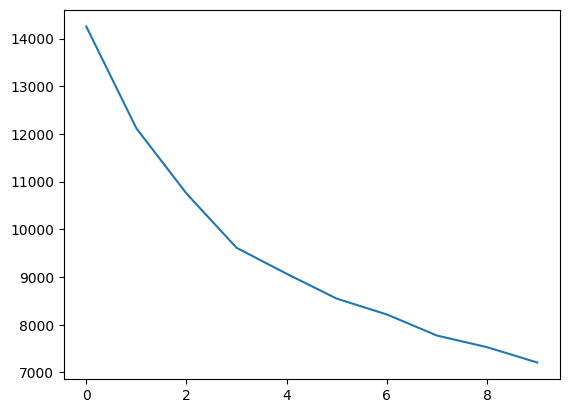

In [281]:
wcss_t_a_ohc=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init="k-means++", random_state=42)
    kmeans.fit(df_attitude_dummies)
    wcss_t_a_ohc.append(kmeans.inertia_)
    
plt.plot(wcss)

In [282]:
km_att_t_ohc=KMeans(n_clusters=2)
km_att_t_ohc.fit(df_attitude_dummies)
silhouette_avg_att_t_ohc=silhouette_score(df_attitude_dummies, km_att_t_ohc.labels_)
print("silhouette score for total attitude ohc:", silhouette_avg_att_t_ohc)

/home/tarek/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


silhouette score for total attitude ohc: 0.13896627140463536


## standardization

In [283]:
df_attitude=df[['X17.Feelings.and.attitudes.towards.artificial.intelligence.and.deep.learning.in.medicine.and.radiology...Artificial.intelligence.will.revolutionize.radiology.',
       'X18.Feelings.and.attitudes.towards.artificial.intelligence.and.deep.learning.in.medicine.and.radiology...Artificial.intelligence.will.revolutionize.medicine.in.general.',
       'X19.Feelings.and.attitudes.towards.artificial.intelligence.and.deep.learning.in.medicine.and.radiology...The.human.radiologist.will.be.replaced.in.the.foreseeable.future.',
       'X20.Feelings.and.attitudes.towards.artificial.intelligence.and.deep.learning.in.medicine.and.radiology...The.human..non.interventional..physician.will.be.replaced.in.the.foreseeable.future.',
       'X21.Feelings.and.attitudes.towards.artificial.intelligence.and.deep.learning.in.medicine.and.radiology...In.the.foreseeable.future..all.physicians.will.be.replaced.',
       'X22.Feelings.and.attitudes.towards.artificial.intelligence.and.deep.learning.in.medicine.and.radiology...These.developments.frighten.me.',
       'X23.Feelings.and.attitudes.towards.artificial.intelligence.and.deep.learning.in.medicine.and.radiology...These.developments.make.radiology.more.exciting.to.me.',
       'X24.Feelings.and.attitudes.towards.artificial.intelligence.and.deep.learning.in.medicine.and.radiology...These.developments.make.medicine.in.general.more.exciting.to.me.',
       'X25.Feelings.and.attitudes.towards.artificial.intelligence.and.deep.learning.in.medicine.and.radiology...Artificial.intelligence.will.never.make.the.human.physician.expendable.',
       'X26.Feelings.and.attitudes.towards.artificial.intelligence.and.deep.learning.in.medicine.and.radiology...The.impact.of.artificial.intelligence.alone.will.reduce.the.number.of.radiologists.that.are.needed..',
       'X27.Feelings.and.attitudes.towards.artificial.intelligence.and.deep.learning.in.medicine.and.radiology...Artificial.intelligence.will.improve.radiology.',
       'X28.Feelings.and.attitudes.towards.artificial.intelligence.and.deep.learning.in.medicine.and.radiology...Artificial.intelligence.will.improve.medicine.in.general.',
       'X29.Feelings.and.attitudes.towards.artificial.intelligence.and.deep.learning.in.medicine.and.radiology...I.am.less.likely.to.consider.a.career.in.radiology..given.the.advancement.of.AI.',
       ]]

In [284]:
df_attitude_s=s.fit_transform(df_attitude)

/home/tarek/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/tarek/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/tarek/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/tarek/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/tarek/.local/lib/python3.10/si

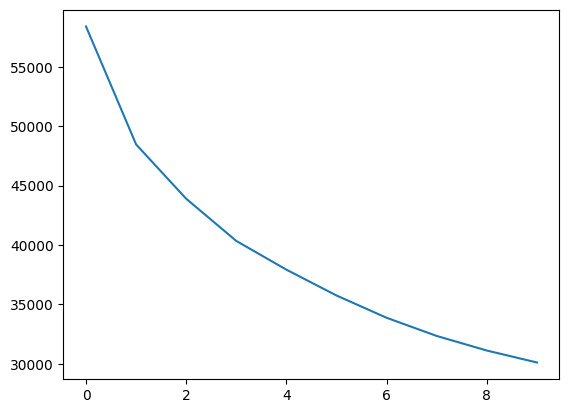

In [285]:
#finding the proper n_clust
wcss_t_a_s=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init="k-means++", random_state=42)
    kmeans.fit(df_attitude_s)
    wcss_t_a_s.append(kmeans.inertia_)
    
plt.plot(wcss_t_a_s)

In [310]:
km_att_t_s=KMeans(n_clusters=2)
km_att_t_s.fit(df_attitude_s)
silhouette_avg_att_t_s=silhouette_score(df_attitude_s, km_att_t_s.labels_)
print("silhouette_avg_att_t_s",silhouette_avg_att_t_s)

/home/tarek/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


silhouette_avg_att_t_s 0.3258727790036544


In [287]:
#silhouette_avg_att_t_s 0.3258727790036544
#silhouette score for total attitude ohc: 0.13896627140463536

In [288]:
df_attitude["km"]=km_att_t_s.predict(df_attitude_s)
df_attitude.km.value_counts()

/tmp/ipykernel_25075/2005127427.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_attitude["km"]=km_att_t_s.predict(df_attitude_s)


0    3818
1     674
Name: km, dtype: int64

In [332]:
from tableone import TableOne
#merging the 2 dfs
df_total_attitude_final=pd.concat([df_demog, df_attitude], axis=1)
total_attitude_clus_table=TableOne(df_total_attitude_final, groupby="km", pval=True)
total_attitude_clus_table.to_csv("total attitude clus table S.csv")

## ai mc section

In [290]:
df_ai_mc=df[['X31.All.medical.students.should.receive.teaching.in.artificial.intelligence',
       'X32.Teaching.in.artificial.intelligence.will.be.beneficial.for.my.career',
       'X33.At.the.end.of.my.medical.degree..I.will.be.confident.in.using.basic.healthcare.AI.tools.if.required',
       'X34.At.the.end.of.my.medical.degree..I.will.have.a.better.understanding.of.the.methods.used.to.assess.healthcare.AI.algorithm.performance',
       'X35.Overall..at.the.end.of.my.medical.degree..I.feel.I.will.possess.the.knowledge.needed.to.work.with.AI.in.routine.clinical.practice']]

In [291]:
from sklearn.preprocessing import StandardScaler
df_ai_mc_s=s.fit_transform(df_ai_mc)

In [292]:
df_ai_mc_s2=pd.DataFrame(df_ai_mc_s)
df_ai_mc_s2.head()

,0,1,2,3,4
0,-0.468060,-0.779978,1.561868,1.481126,1.523427
1,-0.468060,-0.476473,1.561868,-0.565152,-0.545734
2,-0.468060,-0.476473,1.561868,-0.565152,1.523427
3,1.962607,1.951565,1.561868,-0.820937,1.523427
4,-0.468060,-0.476473,-0.548657,-0.565152,-0.545734


/home/tarek/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/tarek/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/tarek/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/tarek/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/tarek/.local/lib/python3.10/si

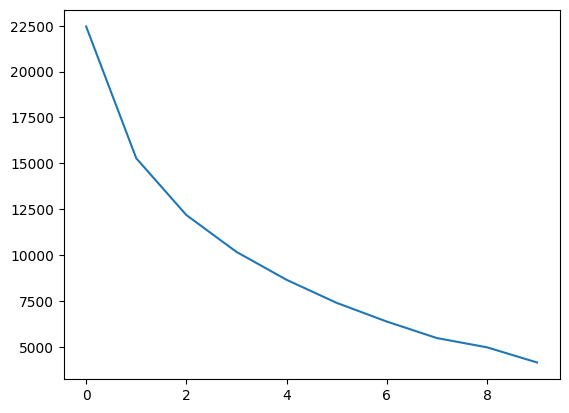

In [293]:
wcss_ai_mc_s=[]
for i in range (1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df_ai_mc_s)
    wcss_ai_mc_s.append(kmeans.inertia_)
    
plt.plot(wcss_ai_mc_s)

In [294]:
km_mc_s=KMeans(n_clusters=2)
km_mc_s.fit(df_ai_mc_s)
silhouette_avg_mc_s=silhouette_score(df_ai_mc_s, km_mc_s.labels_)
print("silhouette_avg_mc_s:",silhouette_avg_mc_s)


/home/tarek/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


silhouette_avg_mc_s: 0.42096242273440815


In [333]:
df_ai_mc["km"]=km_mc_s.predict(df_ai_mc_s)
df_ai_mc_s_final=pd.concat([df_demog,df_ai_mc], axis=1)

/tmp/ipykernel_25075/3373286454.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ai_mc["km"]=km_mc_s.predict(df_ai_mc_s)


In [335]:
ai_mc_s_table=TableOne(df_ai_mc_s_final, groupby="km", pval=True)
ai_mc_s_table.to_csv("ai mc table clust S.csv")

In [297]:
#ai_mc_s_table

## preception section

## OHC

In [298]:
df_precep=df[['X36.Would.you.consider.using.the.following.clinical.workflow..Patients..clinical.images.undergo.artificial.intelligence.analysis..A.specialist.subsequently.reviews.both.the.image.and.the.artificial.intelligence.findings.',
       'X37.What.potential.applications.for.AI.in.radiology.do.you.see...Automated.detection.of.pathologies.in.imaging.exams.',
       'X38.What.potential.applications.for.AI.in.radiology.do.you.see...Automated.diagnosis.in.imaging.exams.',
       'X39.What.potential.applications.for.AI.in.radiology.do.you.see...Automated.indication.of.appropriate.imaging.exams.']]

In [299]:
df_precep=df_precep.astype(object)

In [300]:
df_precep_dummies=pd.get_dummies(df_precep)
df_precep_dummies.shape

/tmp/ipykernel_25075/2413911332.py:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  df_precep_dummies=pd.get_dummies(df_precep)
/tmp/ipykernel_25075/2413911332.py:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  df_precep_dummies=pd.get_dummies(df_precep)
/tmp/ipykernel_25075/2413911332.py:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  df_precep_dummies=pd.get_dummies(df_precep)
/tmp/ipykernel_25075/2413911332.py:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  df_precep_dummies=pd.get_dummies(df_precep)


(4492, 12)

/home/tarek/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/tarek/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/tarek/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/tarek/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/tarek/.local/lib/python3.10/si

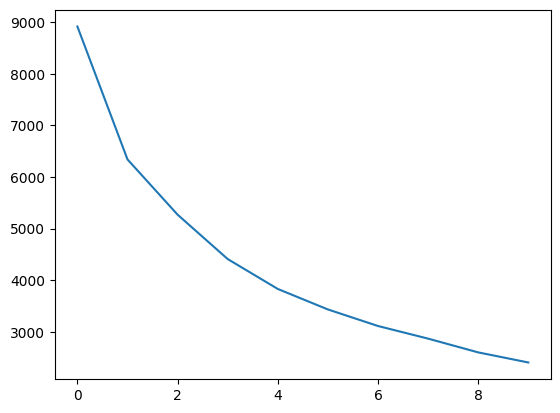

In [301]:
wcss_precep_ohc=[]
for i in range (1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df_precep_dummies)
    wcss_precep_ohc.append(kmeans.inertia_)
    
plt.plot(wcss_precep_ohc)

In [303]:
km_precep_ohc=KMeans(n_clusters=2)
km_precep_ohc.fit(df_precep_dummies)
silhouette_avg_precep_ohc = silhouette_score(df_precep_dummies, km_precep_ohc.labels_)
print('Silhouette score precep ohc:', silhouette_avg_precep_ohc)

/home/tarek/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score precep ohc: 0.37730117374246874


## standerdization

In [304]:
df_precep=df[['X36.Would.you.consider.using.the.following.clinical.workflow..Patients..clinical.images.undergo.artificial.intelligence.analysis..A.specialist.subsequently.reviews.both.the.image.and.the.artificial.intelligence.findings.',
       'X37.What.potential.applications.for.AI.in.radiology.do.you.see...Automated.detection.of.pathologies.in.imaging.exams.',
       'X38.What.potential.applications.for.AI.in.radiology.do.you.see...Automated.diagnosis.in.imaging.exams.',
       'X39.What.potential.applications.for.AI.in.radiology.do.you.see...Automated.indication.of.appropriate.imaging.exams.']]

/home/tarek/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/tarek/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/tarek/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/tarek/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/tarek/.local/lib/python3.10/si

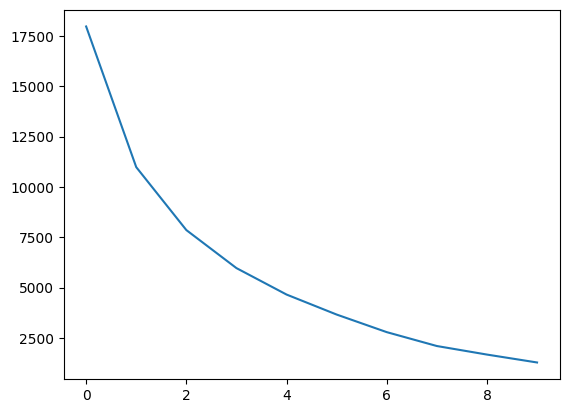

In [305]:
df_precep_s=s.fit_transform(df_precep)

wcss_precep_s=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init="k-means++", random_state=42)
    kmeans.fit(df_precep_s)
    wcss_precep_s.append(kmeans.inertia_)
    
plt.plot(wcss_precep_s)

In [306]:
km_precep_s=KMeans(n_clusters=2)
km_precep_s.fit(df_precep_s)
silhouette_avg_precep_s=silhouette_score(df_precep_s, km_precep_s.labels_)
print("silhouette_avg_precep_s:", silhouette_avg_precep_s)

/home/tarek/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


silhouette_avg_precep_s: 0.5005621120675738


In [336]:
df_precep["km"]=km_precep_s.predict(df_precep_s)
#merging
df_precep_final=pd.concat([df_demog, df_precep], axis=1)
percep_clust_s_table=TableOne(df_precep_final, groupby=("km"), pval=True)

/tmp/ipykernel_25075/581945639.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_precep["km"]=km_precep_s.predict(df_precep_s)


In [338]:
percep_clust_s_table.to_csv("precep clust table S.csv")